## Naïve Bayes
source: Wikipedia

In machine learning, Naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models.

Naïve Bayes has been studied extensively since the 1960s. It was introduced (though not under that name) into the text retrieval community in the early 1960s, and remains a popular (baseline) method for text categorization, the problem of judging documents as belonging to one category or the other (such as spam or legitimate, sports or politics, etc.) with word frequencies as the features. With appropriate pre-processing, it is competitive in this domain with more advanced methods including support vector machines. It also finds application in automatic medical diagnosis.

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

Naïve Bayes is used mainly for text classification, such as spam filtration, sentimental analysis, classifying news articles and recommendation systems. 

The term "naïve" is used because this model makes the assumption that the occurance of a feature is independent of the occurrence of other features, that all the properties contribute to the probability of an event based on previous knowledge available of the events.



#### Install Packages and Import Libraries
Typically packages and libraries are compiled at the start of the code so it's easier to read and understand what is used; however, it's acceptable to install or import at any point in your code.

First, we would normally install the packages. Using mybinder.org, the packages are installed at execution time, so this code is not needed in these tutorials. If you download and run this notebook, you may need to install the packages.

In [1]:
# This is normally where you'd type the code to install the packages required.

# !pip install sklearn
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn

#### Package information for curious minds:
https://numpy.org/devdocs/user/absolute_beginners.html  
https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py  
https://pandas.pydata.org/docs/getting_started/10min.html  
https://scikit-learn.org/stable/tutorial/index.html  
https://seaborn.pydata.org/introduction.html

Next we will import the libraries we need. 

In [2]:
# run this cell
import pandas as pd

##### We shorten _pandas_ to _pd_ in order to save time and also to keep code standardized so that anyone working with your code can easily understand and run it.

In [3]:
# run this cell
import matplotlib.pyplot as plt

##### We provided an alias for _matplotlib.pyplot_ so that we can use _plt_ throughout the code instead of typing matplotlib.pyplot each time. 


Next we will import several different functions from the _sklearn_ module. 

In [4]:
# run this cell
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

To refer to items from a module within your program’s namespace, you can use the <font color=green>__from__</font> … <font color=green>__import__</font> statement.  
When you import modules this way, you can refer to the functions by name rather than through dot notation

In [5]:
# run this cell
import seaborn as sns


Finally, import numpy with the alias "np".  
><font color=green>__import__</font> numpy <font color=green>__as__</font> np

In [6]:
# type the code to import numpy below:

import numpy as np

#### Creating Models
While numerical values may be the natural state of the data provided, such as a table with columns representing height, weight, age, and salary, it is quite common for data to be text values, such as colours ("red", "blue", "yellow", "green"), sizes ("small", "medium", "large") or geographic ("Canada", "Netherlands", "Australia").

While some machine learning algorithms can support categorical data without manipulation, many models require numerical data. This requires transforming the text values into numbers.


#### Label Encoder  
LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. 
> Why n-classes-1? If you recall that Python uses a zero-based index, the first value will start at 0, not 1.

We will use Label Encoder to transform text values to numbers. We will name the variable `le_cities`. Each time we type `le` it is the same as calling `preprocessing.LabelEncoder()`

>`le_cities = preprocessing.LabelEncoder()`

In [7]:
# type the code for le_cities below:
le_cities = preprocessing.LabelEncoder()


Next we will call the fuction `fit` to fit the label encoder and pass through a list of city names.
>`le_cities.fit(["paris", "paris", "tokyo", "amsterdam"])`

In [8]:
# type the code to pass the list of city names into le
le_cities.fit(['paris', 'paris', 'tokyo', 'amsterdam'])


LabelEncoder()

The results of fitting the label encoder were not returned because we didn't specify to do so. 
Let's return the classes in the city list.
>`list(le_cities.classes_)`

In [9]:
# type the code to return the classes
list(le_cities.classes_)


['amsterdam', 'paris', 'tokyo']

Notice that "paris" was returned once, even though it was originally listed twice. Because Label Encoder already assigned a value to "paris", any additional instances will have the same value. This means it will only display unique values.  

Now let's transform a list of cities to numeric values.
>`list(le_cities.transform(["toyko", "toyko", "paris"]))`

In [10]:
# type the code to transform "tokyo", "tokyo", "paris"
list(le_cities.transform(['tokyo', 'tokyo', 'paris']))


[2, 2, 1]

Once we have the numeric values, we can use `inverse_transform` to convert the numbers back to text.  
>`list(le_cities.inverse_transform([2, 2, 1]))`

In [11]:
# type the code to inverse_transform 2, 2, 1
list(le_cities.inverse_transform([2, 2, 1]))


['tokyo', 'tokyo', 'paris']

Now using the code you typed above perform the following steps:
1. create a variable `le_colours`
2. fit "blue", "white", "red" to the label encoder
3. list the classes in le_colours
4. transform "blue" to the encoded value
5. transform the encoded value back to the text "blue"

In [12]:
# type the code for step 1
le_colours = preprocessing.LabelEncoder()

In [13]:
# type the code for step 2
le_colours.fit(['blue', 'white', 'red'])

LabelEncoder()

In [14]:
# type the code for step 3
list(le_colours.classes_)

['blue', 'red', 'white']

In [15]:
# type the code for step 4
list(le_colours.transform(['blue']))

[0]

In [16]:
# type the code for step 5
list(le_colours.inverse_transform([0]))

['blue']

#### Our sample data
For this example, we are using a small golf dataset to predict whether or not someone will play golf based on different conditions.

Our data contains columns of data representing the outlook, temperature (one column in degrees Fahrenheit and one column categorized), humidity (column for relative humidity and one column categorized), windy conditions and whether or not golf was played. Each row represents one day of data.

To start, import the dataset
>`golf_data = pd.read_csv('datasets/golf_dataset.csv')`

In [17]:
# type the code to import the dataset
golf_data = pd.read_csv('datasets/golf_dataset.csv')

Next we will explore the data before doing any transformation. 
To start, let's look at the first 5 rows of data.
>`golf_data.head()`


In [18]:
# type the code to display the first 5 rows of data
golf_data.head()

,outlook,temp,temperature,hum,humidity,windy,play
0,overcast,83,hot,86,high,False,yes
1,overcast,64,cool,65,normal,True,yes
2,overcast,72,mild,90,high,True,yes
3,overcast,81,hot,75,normal,False,yes
4,rainy,70,mild,96,high,False,yes


We can also view the last 5 rows of data using `.tail()`.

>`golf_data.tail()`

In [19]:
# type the code to display the last 5 rows of data
golf_data.tail()

,outlook,temp,temperature,hum,humidity,windy,play
9,sunny,85,hot,85,high,False,no
10,sunny,80,hot,90,high,True,no
11,sunny,72,mild,95,high,False,no
12,sunny,69,cool,70,normal,False,yes
13,sunny,75,mild,70,normal,True,yes


To explore the number of columns and rows in the data, we use `.shape`.
>`golf_data.shape`

In [20]:
# type the code to display the shape of the data
golf_data.shape

(14, 7)

We could also view the shape of the data by viewing the length of the index and columns.
>`len(golf_data.index)`  
>`len(golf_data.columns)`

In [21]:
# type the code to display the length of the index column
len(golf_data.index)

14

In [22]:
# type the code to display the number of columns
len(golf_data.columns)

7

Since this is a small dataset, we could also display the entire table.
>`golf_data`

In [23]:
# type the code to display the golf_data table
golf_data

,outlook,temp,temperature,hum,humidity,windy,play
0,overcast,83,hot,86,high,False,yes
1,overcast,64,cool,65,normal,True,yes
2,overcast,72,mild,90,high,True,yes
3,overcast,81,hot,75,normal,False,yes
4,rainy,70,mild,96,high,False,yes
5,rainy,68,cool,80,normal,False,yes
6,rainy,65,cool,70,normal,True,no
7,rainy,75,mild,80,normal,False,yes
8,rainy,71,mild,91,high,True,no
9,sunny,85,hot,85,high,False,no


One of the most important basic building blocks for machine learning is working with features. Considering data in a table format, a feature is a column with a header that contains different information in each row. Each unique value in a column is called a class.

It's important to understand the features and classes in your data to know which columns contain important information when building your model. A dataset could contain hundreds of columns which have information that may not work in your model - the extremes are one value which makes up all or nearly all the instances, and unique values in each row. 

We can view the unique values in the outlook column to understand how many different values are present.
>`print(golf_data["outlook"].unique())`

In [24]:
# type the code to display the unique values in the outlook column
print(golf_data['outlook'].unique())

['overcast' 'rainy' 'sunny']


The __feature__ is "outlook". The __classes__ are "overcast", "rainy", "sunny".

We can also get a count of the number of instances of each value.
>`print(golf_data.groupby("outlook").size())`

In [25]:
# type the code to display the number of instances of each value
print(golf_data.groupby('outlook').size())

outlook
overcast    4
rainy       5
sunny       5
dtype: int64


We will use the Seaborn library to display some graphs of the data. 

First we will display the count of the outlook data. Outlook is a categorical feature. Recall that categorical or qualitative data is limited in how it can be displayed.

>`sns.countplot(golf_data["outlook"], label="count")`  
>`plt.show()`

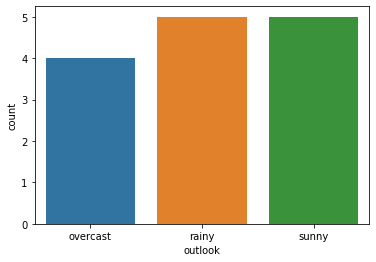

In [26]:
# type the code to create and display the countplot
sns.countplot(golf_data['outlook'], label='count')
plt.show()

Next we will display boxplots of the numerical data: __temp__ and __hum__

> `golf_data.plot(kind = "box", subplots = True, layout = (1,2),`  
> $\qquad$  $\qquad$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `sharex=False, sharey=False, figsize=95,5), title="Box Plot")`  

>`plt.show()`

_Be sure to keep the white space._   
When you hit enter after the comma, it will automatically indent the next line of code to ensure that the proper tabbing is in place. 


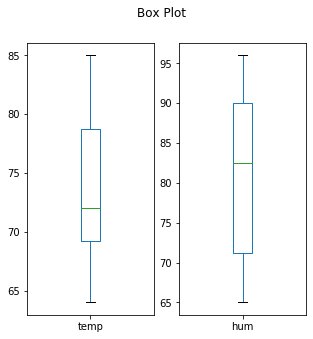

In [27]:
# type the code to display the boxplots
golf_data.plot(kind='box', subplots=True,
              layout=(1,2), sharex=False, sharey=False,
              figsize=(5,5), title='Box Plot')
plt.show()

Now that we understand the data, we are going to use the label encoder to transform the categorical values to numeric values.

We will use `le_outlook` to stand in for `preprocessing.LabelEncoder()` and we will pass through the unique values for the "outlook" feature (or column).

>`le_outlook = preprocessing.LabelEncoder()`  
>`le_outlook.fit(golf_data["outlook"])`

In [28]:
# type the code to fit the "outlook" column to label encoder
le_outlook = preprocessing.LabelEncoder()
le_outlook.fit(golf_data['outlook'])

LabelEncoder()

Review the classes of data in "outlook".  
>`list(le_outlook.classes_)`

_Note: watch for the underscore following `classes`_.

In [29]:
# type the code to display the classes for "outlook"
list(le_outlook.classes_)

['overcast', 'rainy', 'sunny']

We can combine multiple steps in one cell. This code combines the label encoder and displaying the view the classes for "temperature".  
>`le_temp = preprocessing.LabelEncoder()`  
>`le_temp.fit(golf_data["temperature"])`  
>`list(le_temp.classes_)`  

In [30]:
# type the code to label encode and display the classes for "temperature"
le_temp = preprocessing.LabelEncoder()
le_temp.fit(golf_data['temperature'].unique())
list(le_temp.classes_)

['cool', 'hot', 'mild']

Repeat the code to create the following variables:
 - le_hum for "humidity"
 - le_windy for "windy"
 - le_play for "play"

In [31]:
# type the code to label encode and display the classes for "humidity"
le_hum = preprocessing.LabelEncoder()
le_hum.fit(golf_data['humidity'].unique())
list(le_hum.classes_)

['high', 'normal']

In [32]:
# type the code to label encode and display the classes for "windy"
le_windy = preprocessing.LabelEncoder()
le_windy.fit(golf_data['windy'].unique())
list(le_windy.classes_)

[False, True]

In [33]:
# type the code to label encode and display the classes for "play"
le_play = preprocessing.LabelEncoder()
le_play.fit(golf_data['play'].unique())
list(le_play.classes_)

['no', 'yes']

We are going to create a new dataframe for the Label Encoder values, using `le_golf_data`.  First, we declare `le_golf_data` as a dataframe. When we display `le_golf_data` it will appear empty because nothing has been added to it yet.

>`le_golf_data = pd.DataFrame()`  
>`le_golf_data`

In [34]:
# type the code to create le_golf_data
le_golf_data = pd.DataFrame()
le_golf_data

""


Earlier, we created `le_outlook` with encoded lables.

>`le_outlook.transform(golf_data['outlook'])`

In [35]:
# type the code to display le_outlook
le_outlook.transform(golf_data['outlook'])

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

We will add a column for "outlook" to our new le_golf_data dataframe using this previously encoded `le_outlook` variable.  
>`le_golf_data["outlook"] = le_outlook.transform(golf_data["outlook"])`  
>`le_golf_data`

In [36]:
# type the code to add the new "outlook" column to le_golf_data from the previously used variables.
le_golf_data['outlook'] = le_outlook.transform(golf_data['outlook'])
le_golf_data

,outlook
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,1
9,2


Repeat for each of the features in the golf dataset.

>`le_golf_data['temperature'] = le_temp.transform(golf_data['temperature'])`  
>`le_golf_data['humidity'] = le_hum.transform(golf_data['humidity'])`  
>`le_golf_data['windy'] = le_windy.transform(golf_data['windy'])`  
>`le_golf_data['play'] = le_play.transform(golf_data['play'])`  
>`le_golf_data`

In [37]:
# type the code to add new columns to le_golf_data from the previously used variables.
le_golf_data['temperature'] = le_temp.transform(golf_data['temperature'])
le_golf_data['humidity'] = le_hum.transform(golf_data['humidity'])
le_golf_data['windy'] = le_windy.transform(golf_data['windy'])
le_golf_data['play'] = le_play.transform(golf_data['play'])
le_golf_data

,outlook,temperature,humidity,windy,play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


Now we will declare the features of our dataset. For the machine learning model, this means that this information will be the inputs. For future use, we expect to have the data for these features to make the target predictions.  
>`features = ["outlook", "temperature", "humidity", "windy"]`  
>`features`

In [38]:
# type the code to declare and display the feature columns
features = ['outlook', 'temperature', 'humidity', 'windy']
features

['outlook', 'temperature', 'humidity', 'windy']

Let's take a look at golf_data features to review the values in each column.
>`golf_data[features]`

In [39]:
# type the code to view the golf_data features
golf_data[features]

,outlook,temperature,humidity,windy
0,overcast,hot,high,False
1,overcast,cool,normal,True
2,overcast,mild,high,True
3,overcast,hot,normal,False
4,rainy,mild,high,False
5,rainy,cool,normal,False
6,rainy,cool,normal,True
7,rainy,mild,normal,False
8,rainy,mild,high,True
9,sunny,hot,high,False


Let's take a look at le_golf_data features to review the encoded values in each column.
>`le_golf_data[features]`

In [40]:
# type the code to view the le_golf_data features
le_golf_data[features]

,outlook,temperature,humidity,windy
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1
3,0,1,1,0
4,1,2,0,0
5,1,0,1,0
6,1,0,1,1
7,1,2,1,0
8,1,2,0,1
9,2,1,0,0


Now we will declare the target of our dataset. Our target will be the predicted value. Our machine learning model will look at the data in the features and predict whether or not golf will be played based on the values in the features. 

Our model is supervised learning, as we are providing information about the predicted value - we know the conditions in the features that occurred when golf was played, so our model can solve based on the previous information.
>`target = "play"`  
>`target`

In [51]:
# type the code to declare the target
target = 'play'
le_golf_data[target]

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: play, dtype: int32

We will use Gaussian Naive Bayes to create our model.

Gaussian Naive Bayes is an algorithm having a Probabilistic Approach. It involves prior and posterior probability calculation of the classes in the dataset and the test data given a class respectively. Prior probabilities of all the classes are calculated using the same formula.


>`model = GaussianNB()`  
>`model.fit(le_golf_data[features], le_golf_data[target])`

In [52]:
# type the code to create the Gaussian model
model = GaussianNB()
model.fit(le_golf_data[features], le_golf_data[target])

GaussianNB(priors=None, var_smoothing=1e-09)

Now we will test our model using new data inputs for the features. For this test we will input the following:
 - test outlook=sunny
 - temperature=cool
 - humidity=high
 - windy=True
We will need to use the transformed numeric values.
>`a = list(le_outlook.transform(['sunny']))`  
>`a.extend(list(le_temp.transform(['cool'])))`  
>`a.extend(list(le_hum.transform(['high'])))`  
>`a.extend(list(le_windy.transform([True])))`  
>`a`  

In [43]:
# type the code to test outlook=sunny, temperature=cool, humidity=high, windy=True
a = list(le_outlook.transform(['sunny']))
a.extend(list(le_temp.transform(['cool'])))
a.extend(list(le_hum.transform(['high'])))
a.extend(list(le_windy.transform([True])))
a

[2, 0, 0, 1]

To view the prediction, we need to call the results.

>`print(model.predict([a]))`

In [44]:
# type the code to display the prediction
print(model.predict([a]))

[0]


Of course, the result is the encoded value - that's what we provided to the model. To translate back to text, you can wrap the call with the `inverse_tranform` function.
>`print(le_play.inverse_transform(model.predict([a])))`

In [45]:
# type the code to translate the numeric value back to text
print(le_play.inverse_transform(model.predict([a])))

['no']


Next, we want to look at the accuracy of the classification model. This compares the true values to the predicted values to determine the accuracy. The value returned is the fraction of correctly classified samples. Our example only has one predicted value.

>`accuracy = accuracy_score([0], model.predict([a]))`  
>`accuracy`

In [46]:
# type the code to display the accuracy of the predicted values
accuracy = accuracy_score([0], model.predict([a]))
accuracy

1.0

Now we will test our model using different data inputs for the features. For this test we will input the following:
 - test outlook=sunny
 - temperature=hot
 - humidity=normal
 - windy=False

>`a = list(le_outlook.transform(['sunny']))`  
>`a.extend(list(le_temp.transform(['hot'])))`  
>`a.extend(list(le_hum.transform(['normal'])))`  
>`a.extend(list(le_windy.transform([False])))`  
>`a`


In [47]:
# type the code to test outlook=sunny, temperature=hot, humidity=normal, windy=False
a = list(le_outlook.transform(['sunny']))
a.extend(list(le_temp.transform(['hot'])))
a.extend(list(le_hum.transform(['normal'])))
a.extend(list(le_windy.transform([False])))
a


[2, 1, 1, 0]

Display the prediction and transform back to text.

>`print(model.predict([a]))`  
>`print(le_play.inverse_transform(model.predict([a])))`

In [48]:
# type the code to display the prediction and translate the numeric value back to text
print(model.predict([a]))
print(le_play.inverse_transform(model.predict([a])))

[1]
['yes']


Display the accuracy score for the new test.

>`accuracy = accuracy_score([1], model.predict([a]))`  
>`accuracy`

In [49]:
# type the code to display the accuracy of the predicted values
accuracy = accuracy_score([1], model.predict([a]))
accuracy

1.0

In [50]:
# add a comment explaining when you would use LabelEncoder


Download this completed notebook and upload to the Teams Assignment to mark it as complete. 
#### File > Download as > Notebook (.ipynb)